# Astro 8030 HW2
## Mary Kaldor
## October 15, 2024

### Problem 4
#### a. Prepare a $log \rho - log T$ plot with the range: $-10 \leq log \rho \leq 10$ (x-axis) and $4 \leq log T \leq 10$ (y-axis). Write down the equations $log T = f(log \rho)$ that characterize the boundaries in this plane between different regimes in pressure. Specifically, where the radiation pressure is equal to the ideal gas pressure, the ideal gas pressure is equal to the pressure of degenerate, non-relativistic electron gas, the pressure of degenerate, non-relativistic electron gas is equal to the pressure of degenereate, relativistic electron gas. Adopt: X=0, Y=1, Z=0 and assume that the gas is fully ionized. Plot these three curves on your $log \rho - log T$ plot and label the regions on the plot where each type of pressure dominates.

In [1]:
import astropy
import numpy as np
import scipy
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u

ImportError: cannot import name 'packages_distributions' from 'importlib.metadata' (/home/kaldorme/miniconda3/envs/astro8070/lib/python3.9/importlib/metadata.py)

## $\mu_i = \frac{Y}{A_Y} = \frac{1}{4}$
## $\mu_e = \frac{Y*Z_Y*y_Y}{A_Y} = \frac{1*2*1}{4} = \frac{1}{2}$

In [2]:
h = const.h.cgs
k = const.k_B.cgs
a = 7.5e-15*u.erg/((u.cm**3)*(u.K**4))
N_A = const.N_A.cgs
mu_i = 1/4*u.g/u.mol
m_e = const.m_e.cgs
mu_e = 1/2*u.g/u.mol
c = const.c.cgs

NameError: name 'const' is not defined

## $P_{rad} = \frac{1}{3}aT^4$
## $P_{ion} = \frac{N_Ak\rho T}{\mu_i}$
## $P_{rad} = P_{ion} \rightarrow T=\sqrt[3]{\frac{3N_Ak\rho}{\mu_ia}}$

In [137]:
def rad_ion(rho):
    T=((3*N_A*k*rho)/(mu_i*a))**(1/3)
    return T

t = rad_ion(10*u.g/(u.cm)**3)
t

<Quantity 1.09981099e+08 K>

## $P_{ion} = \frac{N_Ak\rho T}{\mu_i}$
## $P_{e,d,NR} = (\frac{3}{8\pi})^{\frac{2}{3}}\frac{h^2}{5m_e}(\frac{N_A}{\mu_e})^{\frac{5}{3}}\rho^{\frac{5}{3}}$
## $P_{ion} = P_{e,d,NR} \rightarrow T=(\frac{3}{8\pi})^{\frac{2}{3}}\frac{h^2}{5m_e}(\frac{N_A}{\mu_e})^{\frac{5}{3}}\rho^{\frac{5}{3}}\frac{\mu_i}{N_Ak\rho}$

In [138]:
def ion_ednr(rho):
    t=((3/(8*np.pi))**(2/3))*((h**2)/(5*m_e))*((N_A/mu_e)**(5/3))*(rho**(5/3))*(mu_i/(N_A*k*rho))
    # These extra units don't actually change the meaning - astropy can't figure out how to turn ergs and dynes into grams,
    # centimeters, and seconds (so it doesn't cancel the units for you)
    return t*u.g*((u.cm)**2)/(u.s**2)/u.erg

t = ion_ednr(1*u.g/((u.cm)**3))
t

<Quantity 95803.48539382 K>

## $P_{e,d,NR} = (\frac{3}{8\pi})^{\frac{2}{3}}\frac{h^2}{5m_e}(\frac{N_A}{\mu_e})^{\frac{5}{3}}\rho^{\frac{5}{3}}$
## $P_{e,d,UR} = (\frac{3}{8\pi})^{\frac{1}{3}}\frac{hc}{4}(\frac{N_A}{\mu_e})^{\frac{4}{3}}\rho^{\frac{4}{3}}$
## $P_{e,d,NR} = P_{e,d,UR} \rightarrow (\frac{3}{8\pi})^{\frac{2}{3}}\frac{h^2}{5m_e}(\frac{N_A}{\mu_e})^{\frac{5}{3}}\rho^{\frac{5}{3}} = (\frac{3}{8\pi})^{\frac{1}{3}}\frac{hc}{4}(\frac{N_A}{\mu_e})^{\frac{4}{3}}\rho^{\frac{4}{3}}$
## $(\frac{3}{8\pi})^{\frac{1}{3}}\frac{h^2}{5m_e}(\frac{N_A}{\mu_e})^{\frac{5}{3}}\rho^{\frac{5}{3}} = \frac{hc}{4}(\frac{N_A}{\mu_e})^{\frac{4}{3}}\rho^{\frac{4}{3}}$
## $(\frac{3}{8\pi})^{\frac{1}{3}}\frac{h^2}{5m_e}(\frac{N_A}{\mu_e})^{\frac{1}{3}}\rho^{\frac{5}{3}} = \frac{hc}{4}\rho^{\frac{4}{3}}$
## $(\frac{3}{8\pi})^{\frac{1}{3}}\frac{h^2}{5m_e}(\frac{N_A}{\mu_e})^{\frac{1}{3}}\rho^{\frac{1}{3}} = \frac{hc}{4}$
## $(\frac{3}{8\pi})^{\frac{1}{3}}\frac{h}{5m_e}(\frac{N_A}{\mu_e})^{\frac{1}{3}}\rho^{\frac{1}{3}} = \frac{c}{4}$
## $\rho^{\frac{1}{3}} = \frac{c}{4(\frac{3}{8\pi})^{\frac{1}{3}}\frac{h}{5m_e}(\frac{N_A}{\mu_e})^{\frac{1}{3}}}$
## $\rho = ({\frac{c}{4(\frac{3}{8\pi})^{\frac{1}{3}}\frac{h}{5m_e}(\frac{N_A}{\mu_e})^{\frac{1}{3}}}})^3$
## $\rho = \frac{c^3}{64(\frac{3}{8\pi})\frac{h^3}{125m_e^3}(\frac{N_A}{\mu_e})}$
## $\rho = \frac{125\pi c^3}{24(\frac{h}{m_e})^3(\frac{N_A}{\mu_e})}$

In [139]:
def ednr_edr():
    rho = (125*np.pi*(c**3))/(24*((h/m_e)**3)*(N_A/mu_e))
    # These extra units don't actually change the meaning - astropy can't figure out how to turn ergs and dynes into grams,
    # centimeters, and seconds (so it doesn't cancel the units for you)
    return rho*((u.erg)**3)*((u.s)**6)/(((u.g)**3)*((u.cm)**6))

ednredr = ednr_edr()
ednredr

<Quantity 951105.63184488 g / cm3>

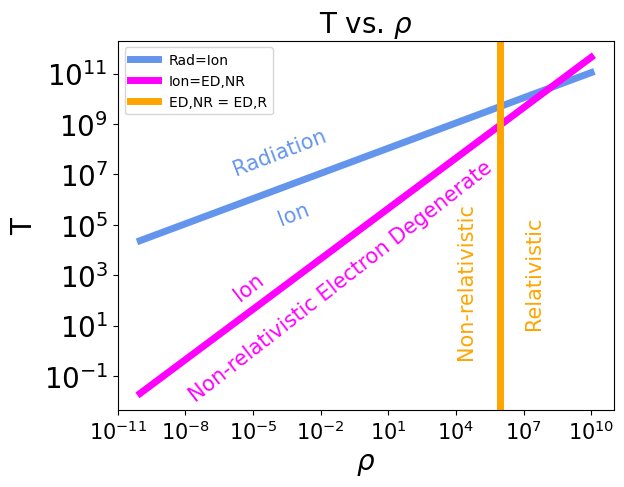

In [140]:
rho = np.linspace(1e-10, 1e10, 1000)
rho = rho*(u.g/((u.cm)**3))
t_1 = rad_ion(rho)
t_2 = ion_ednr(rho)
ednredr = ednr_edr()
plt.loglog(rho, t_1, color="cornflowerblue", linewidth=5, label="Rad=Ion")
plt.loglog(rho, t_2, color="magenta", linewidth=5, label="Ion=ED,NR")
plt.axvline(ednredr.value, color="orange", linewidth=5, label="ED,NR = ED,R")
plt.xlabel(r"$\rho$", fontsize=20)
plt.ylabel("T", fontsize=20)
plt.title(r"T vs. $\rho$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.text(1e-6, 1e7, "Radiation", rotation=21, fontsize=15, color="cornflowerblue")
plt.text(1e-4, 1e5, "Ion", rotation=21, fontsize=15, color="cornflowerblue")
plt.text(1e-6, 1e2, "Ion", rotation=38, fontsize=15, color="magenta")
plt.text(1e-8, 1e-2, "Non-relativistic Electron Degenerate", rotation=38, fontsize=15, color="magenta")
plt.text(1e7, 1e1, "Relativistic", rotation=90, fontsize=15, color="orange")
plt.text(1e4, 0.7, "Non-relativistic", rotation=90, fontsize=15, color="orange")
plt.legend()
plt.show()

#### b. The total gas pressure can be written as $P_{tot} = P_{rad} + P_{ion} + P_e$, where $P_{rad}$ is the radiation pressure, $P_{ion}$ is the ideal gas ion pressure, and $P_e$ is the total electron pressure. You can approximate the electron pressure as the sum in quadrature of the non-degenerate and degenerate components: $P_e = (P_{e,nd}^2 + P_{e,d}^2)^{1/2}$, and assume that the degenerate electrons are non-relativistic. Write a computer routine that computes the total gas pressure for a given gas density $\rho$, temperatuer $T$, and mean molecular weights for ions and electrons $\mu_i$ and $\mu_e$. Use your routine to make a plot of total gas pressure $logP_{tot}$ versus density $log \rho$ for the following values of temperature: $log T = 5, 6, 7, 8$, assuming the mean molecular weight from part a.

In [141]:
def electron(rho, T):
    p_end = N_A*k*rho*T/mu_e
    p_ed = ((3/(8*np.pi))**(2/3))*((h**2)/(5*m_e))*((N_A/mu_e)**(5/3))*(rho**(5/3))
    p_e = (((p_end)**2)+((p_ed)**2))**(1/2)
    return p_e

In [142]:
def pressure(rho, T):
    p_rad = a*(T**4)/3
    p_ion = N_A*k*rho*T/mu_i
    p_e = electron(rho, T)
    p_tot = p_rad+p_ion+p_e
    return p_tot.value

In [143]:
ptot5 = [pressure(rho, 1e5*u.K) for rho in rho]
ptot6 = [pressure(rho, 1e6*u.K) for rho in rho]
ptot7 = [pressure(rho, 1e7*u.K) for rho in rho]
ptot8 = [pressure(rho, 1e8*u.K) for rho in rho]

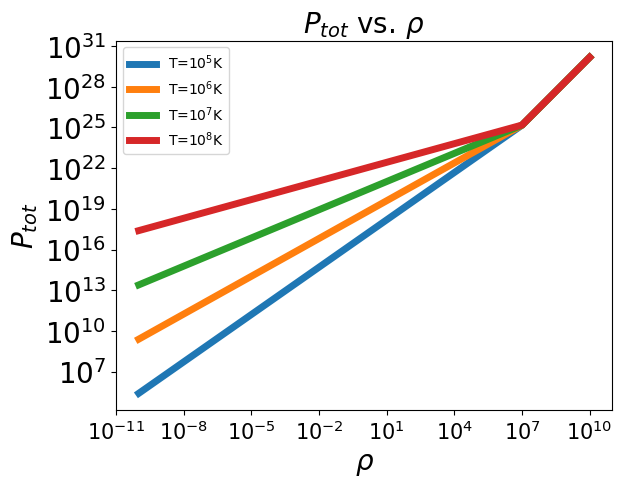

In [144]:
plt.loglog(rho, ptot5, linewidth=5, label=r"T=$10^5$K")
plt.loglog(rho, ptot6, linewidth=5, label=r"T=$10^6$K")
plt.loglog(rho, ptot7, linewidth=5, label=r"T=$10^7$K")
plt.loglog(rho, ptot8, linewidth=5, label=r"T=$10^8$K")
plt.xlabel(r"$\rho$", fontsize=20)
plt.ylabel(r"$P_{tot}$", fontsize=20)
plt.title(r"$P_{tot}$ vs. $\rho$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend()
plt.show()